In [1]:
#import libraries 
import pandas as pd
import numpy as np


In [2]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

# Pretty display for notebooks
%matplotlib inline

import seaborn as sns

In [3]:
pd.options.display.max_columns = None

In [4]:
#function to read and format csv file 
#input: file
#output: df without NaNs, proper format

def read_format(file):
    df = pd.read_csv(file, header=1, parse_dates=True)
    df = df.drop(df.tail(2).index)
    #df['Open Interest'].fillna(method='ffill', inplace=True)
    
    
    return df

In [5]:
# set files to a variable
file_one = r"C:\Users\Matt\Desktop\eur_data_cash.csv"

In [6]:
# read in and clean csv files to a data frame 
eur = read_format(file_one)

In [7]:
eur.head()

,Date Time,Open,High,Low,Close,Change,Volume
0,1/9/2012,1.26870,1.27840,1.26658,1.27638,0.00000,342840.0
1,1/10/2012,1.27645,1.28169,1.27430,1.27767,0.00129,342942.0
2,1/11/2012,1.27760,1.27890,1.26639,1.27053,-0.00714,353486.0
3,1/12/2012,1.27060,1.28440,1.26993,1.28134,0.01081,352859.0
4,1/13/2012,1.28120,1.28770,1.26257,1.26782,-0.01352,382726.0


In [8]:
len(eur)

2064

In [9]:
days_to_train = 42

In [10]:
new_df = eur.iloc[-days_to_train:].copy()

In [11]:
new_df.tail()

,Date Time,Open,High,Low,Close,Change,Volume
2059,12/16/2019,1.11295,1.11577,1.11225,1.11433,0.00255,114831.0
2060,12/17/2019,1.11433,1.11740,1.11290,1.11500,0.00067,141052.0
2061,12/18/2019,1.11498,1.11538,1.11104,1.11122,-0.00378,121727.0
2062,12/19/2019,1.11123,1.11438,1.11073,1.11196,0.00074,139068.0
2063,12/20/2019,1.11197,1.11246,1.10661,1.10748,-0.00448,119919.0


In [12]:
'''
    Objective:  sample a dataframe for the historical volatility, find the mean over the iterations and probability 
                that vol is greater than a certain vol over that period.  
    INPUT:
    dataframe: the dataframe to sample from
    iterations: how many iterations
    range_btw_dates: range of dates to sample in consecutive order
    
    straddle_to_compare: straddle to calculate what percentage of the iterations were greater 
    lost_threshold: straddle of stop loss to calculate what percentage of the iterations were greater, 
    the downside stop loss percentage
    profit_objective: straddle of objective profit to calculate what percentage of the iterations were greater, 
    the upside, profit taking
    
    OUTPUT:
    Return the list of sample means, print a variety of statistics around the sample means.  
'''

def option_calc_group_days(df, iterations, range_btw_dates, straddle_to_compare,
                           lost_threshold, profit_objective, replace = True):
    x = 0
    moves = []
    max_index = len(df) - range_btw_dates
    while x < iterations:
        the_sample = df.sample()
        the_dex = min(df.index.get_loc(the_sample.iloc[0].name), max_index)
        plus_the_dex = the_dex + range_btw_dates
        
        the_new_df = df[the_dex:plus_the_dex]
        start_price = the_new_df['Close'].iloc[0]
        end_price = the_new_df['Close'].iloc[(range_btw_dates - 1)]
        
        #calculate the move and multiply by two for straddle price
        
        the_move = (np.abs(start_price - end_price)) 
        
        moves.append(the_move)
    
        x = x + 1 
    mean = np.mean(moves)
    
    mean = round(mean, 5)
    per_above_vol = round((len([i for i in moves if i > straddle_to_compare]) )/iterations, 4)
    
    per_above_lost_threshold = round((len([i for i in moves if i > lost_threshold]) )/iterations, 4)
    
    per_above_profit_objective = round((len([i for i in moves if i > profit_objective]) )/iterations, 4)
    
    
    min_move = round(min(moves), 5)
    max_move = round(max(moves), 5)
    
    
    
    
    print('The date range includes',len(df), 'days')
    print(range_btw_dates, 'day time periods were sampled')
    print('The straddle price as per the mean move is:', mean)
    print('The max straddle in the sample was:', max_move)
    print('The min straddle in the sample was:', min_move)
    print('The percentage of sample groups that had mean straddles above', straddle_to_compare , 'is:',
          per_above_vol)
    print('The percentage of sample groups that had mean straddles above', lost_threshold , 'is:',
          per_above_lost_threshold)
    print('The percentage of sample groups that had mean straddles above', profit_objective , 'is:',
          per_above_profit_objective)
    
    
    return moves
    
    


In [13]:
the_list = option_calc_group_days(new_df, 10000, 7,.0045, .0035, .0075,  replace = True)

The date range includes 42 days
7 day time periods were sampled
The straddle price as per the mean move is: 0.00561
The max straddle in the sample was: 0.01331
The min straddle in the sample was: 0.00014
The percentage of sample groups that had mean straddles above 0.0045 is: 0.7626
The percentage of sample groups that had mean straddles above 0.0035 is: 0.8313
The percentage of sample groups that had mean straddles above 0.0075 is: 0.1851


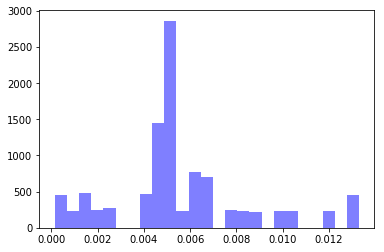

In [14]:
num_bins = 25
x = the_list
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.show()